Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error , r2_score ,mean_squared_error

creating the dataframe

In [2]:
path="C:/Users/ykott/Desktop/kc_house_data.csv"
df=pd.read_csv(path, parse_dates=['date'])

In [3]:
df.shape

(21613, 21)

In [4]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [6]:
df.drop("id",axis=1,inplace=True)

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


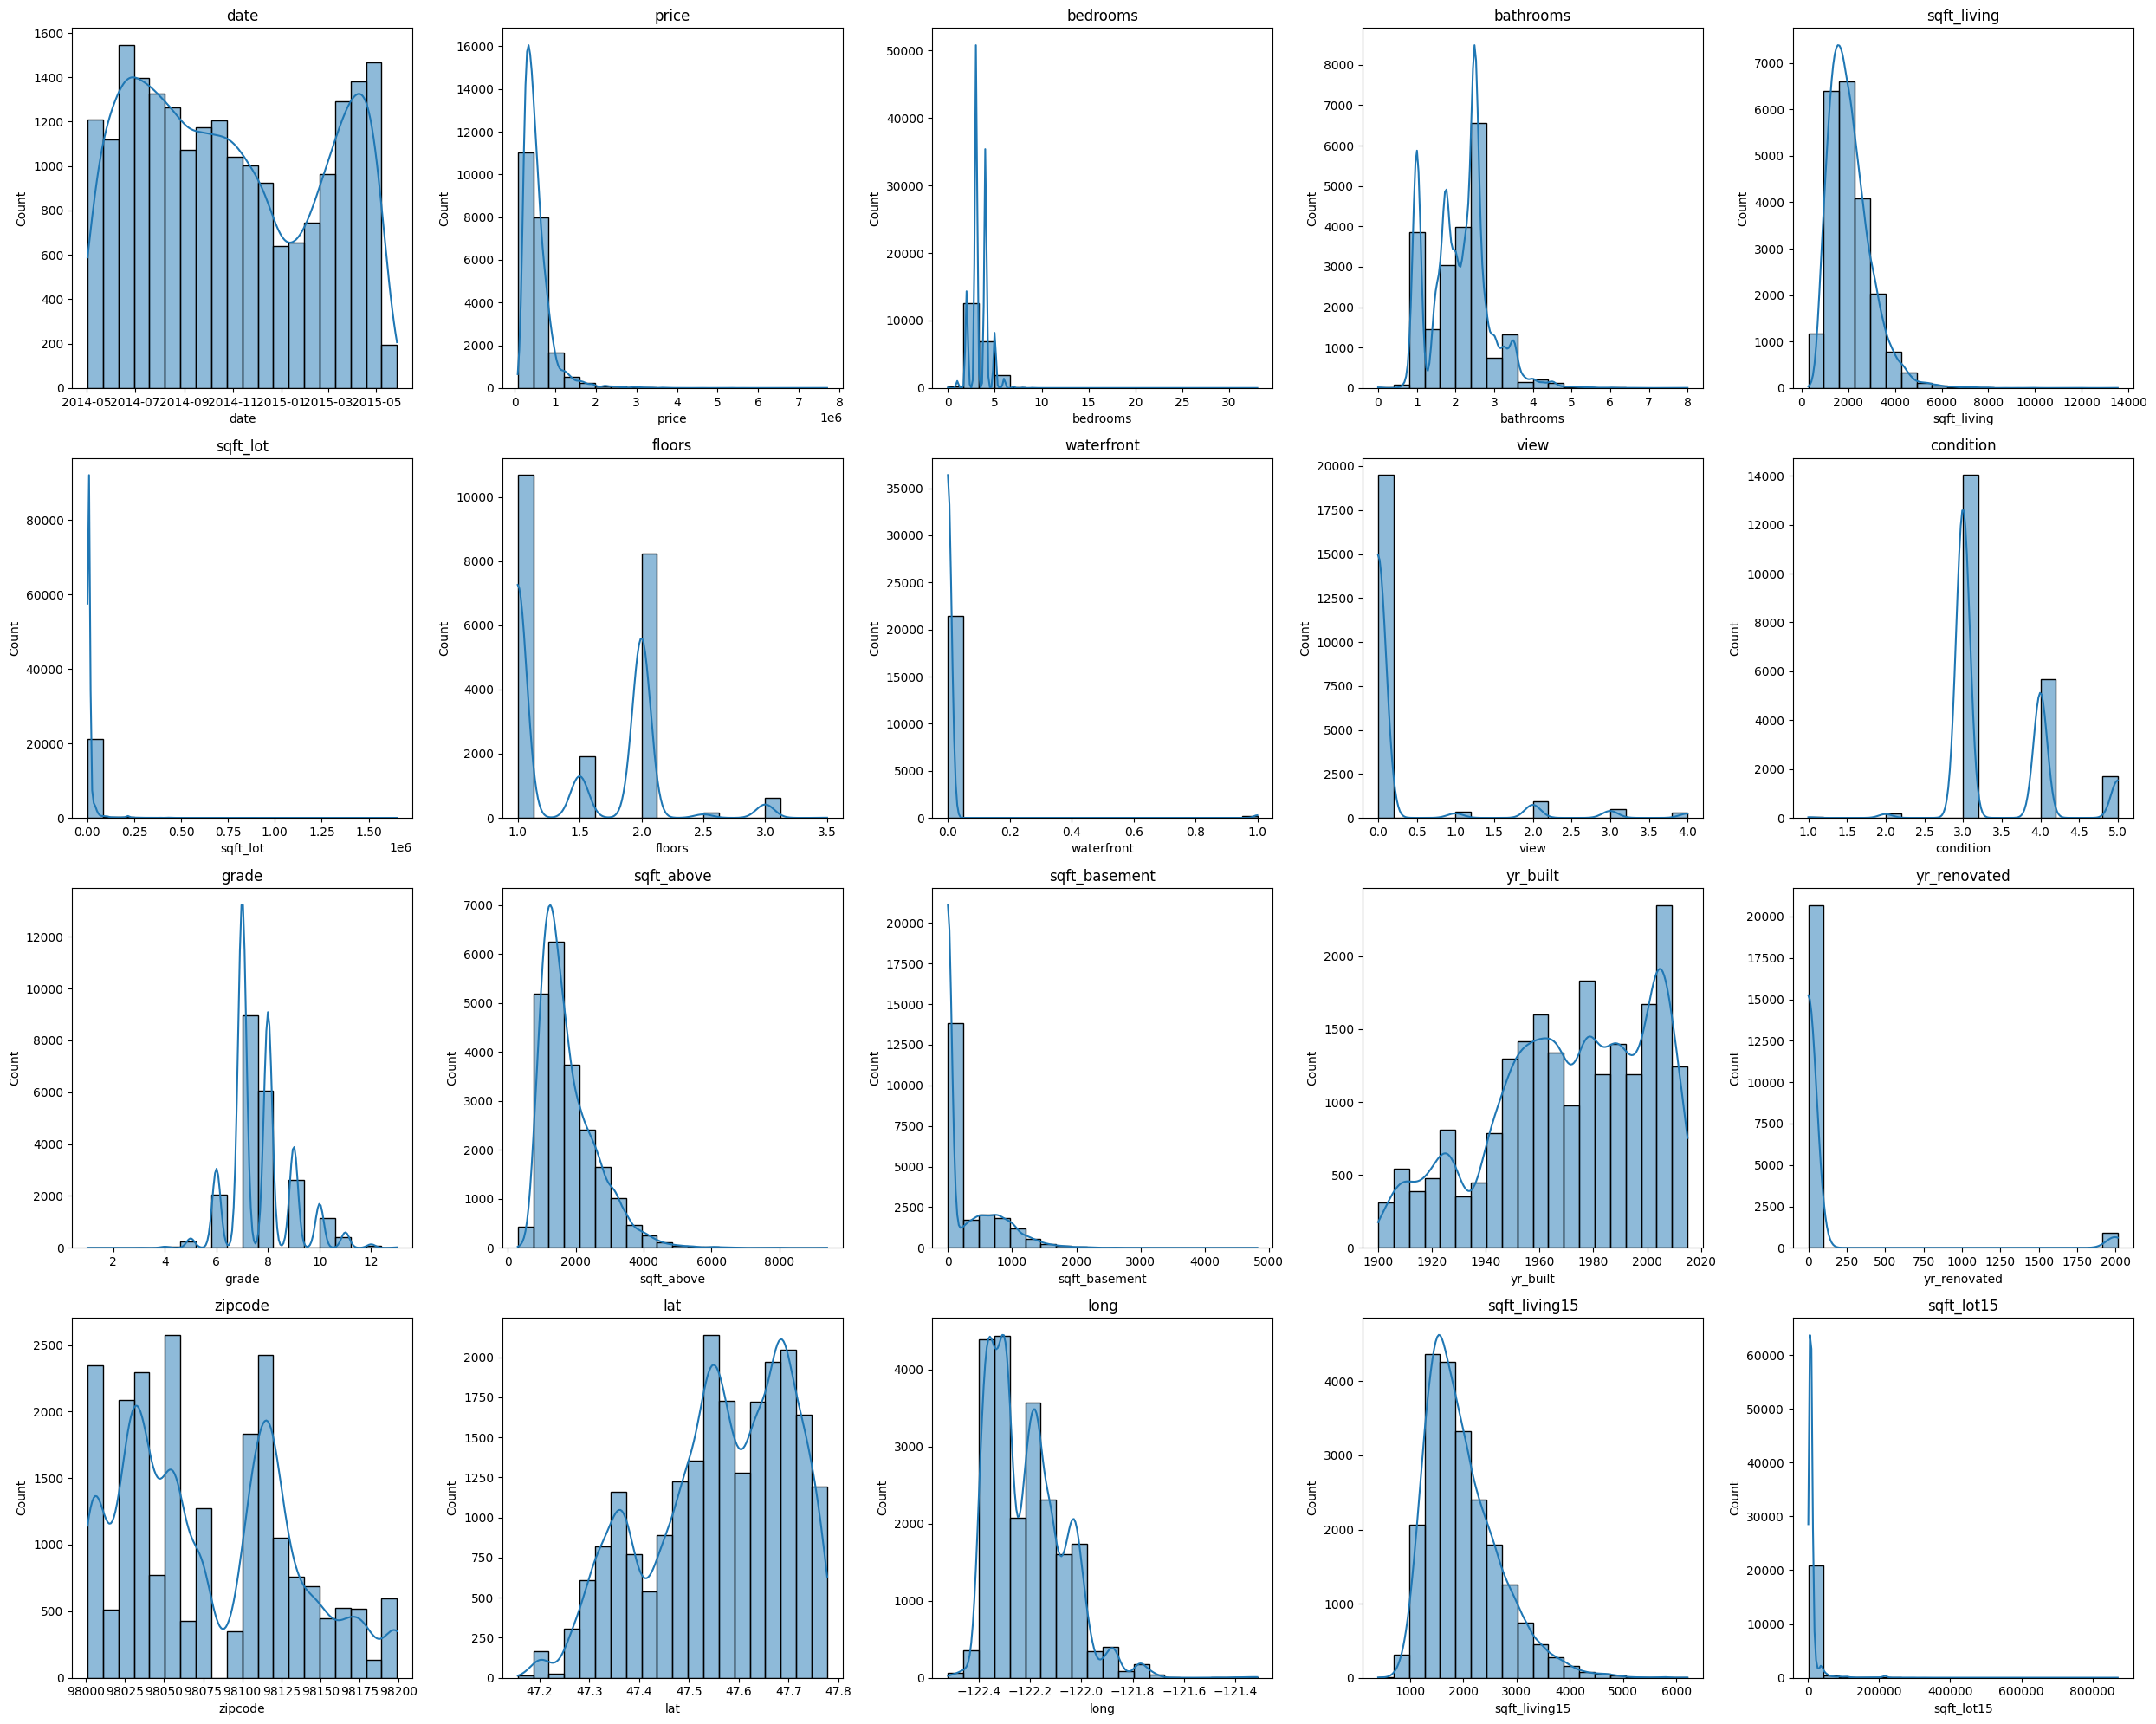

In [9]:
plt.figure(figsize=(25,20))
for feature in df.columns.to_list():
    plt.subplot(4,5,df.columns.to_list().index(feature)+1)
    sns.histplot(data=df[feature],bins=20,kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [10]:
df['view'].value_counts().reset_index()

,view,count
0,0,19489
1,2,963
2,3,510
3,1,332
4,4,319


In [11]:
df['waterfront'].value_counts().reset_index()


,waterfront,count
0,0,21450
1,1,163


In [12]:
df['yr_renovated'].value_counts().reset_index()

,yr_renovated,count
0,0,20699
1,2014,91
2,2013,37
3,2003,36
4,2005,35
...,...,...
65,1951,1
66,1959,1
67,1948,1
68,1954,1


Data which are not closely related are dropped

In [13]:
df.drop(["waterfront","view","zipcode","yr_renovated"],axis =1 ,inplace = True)

Data Visualisation

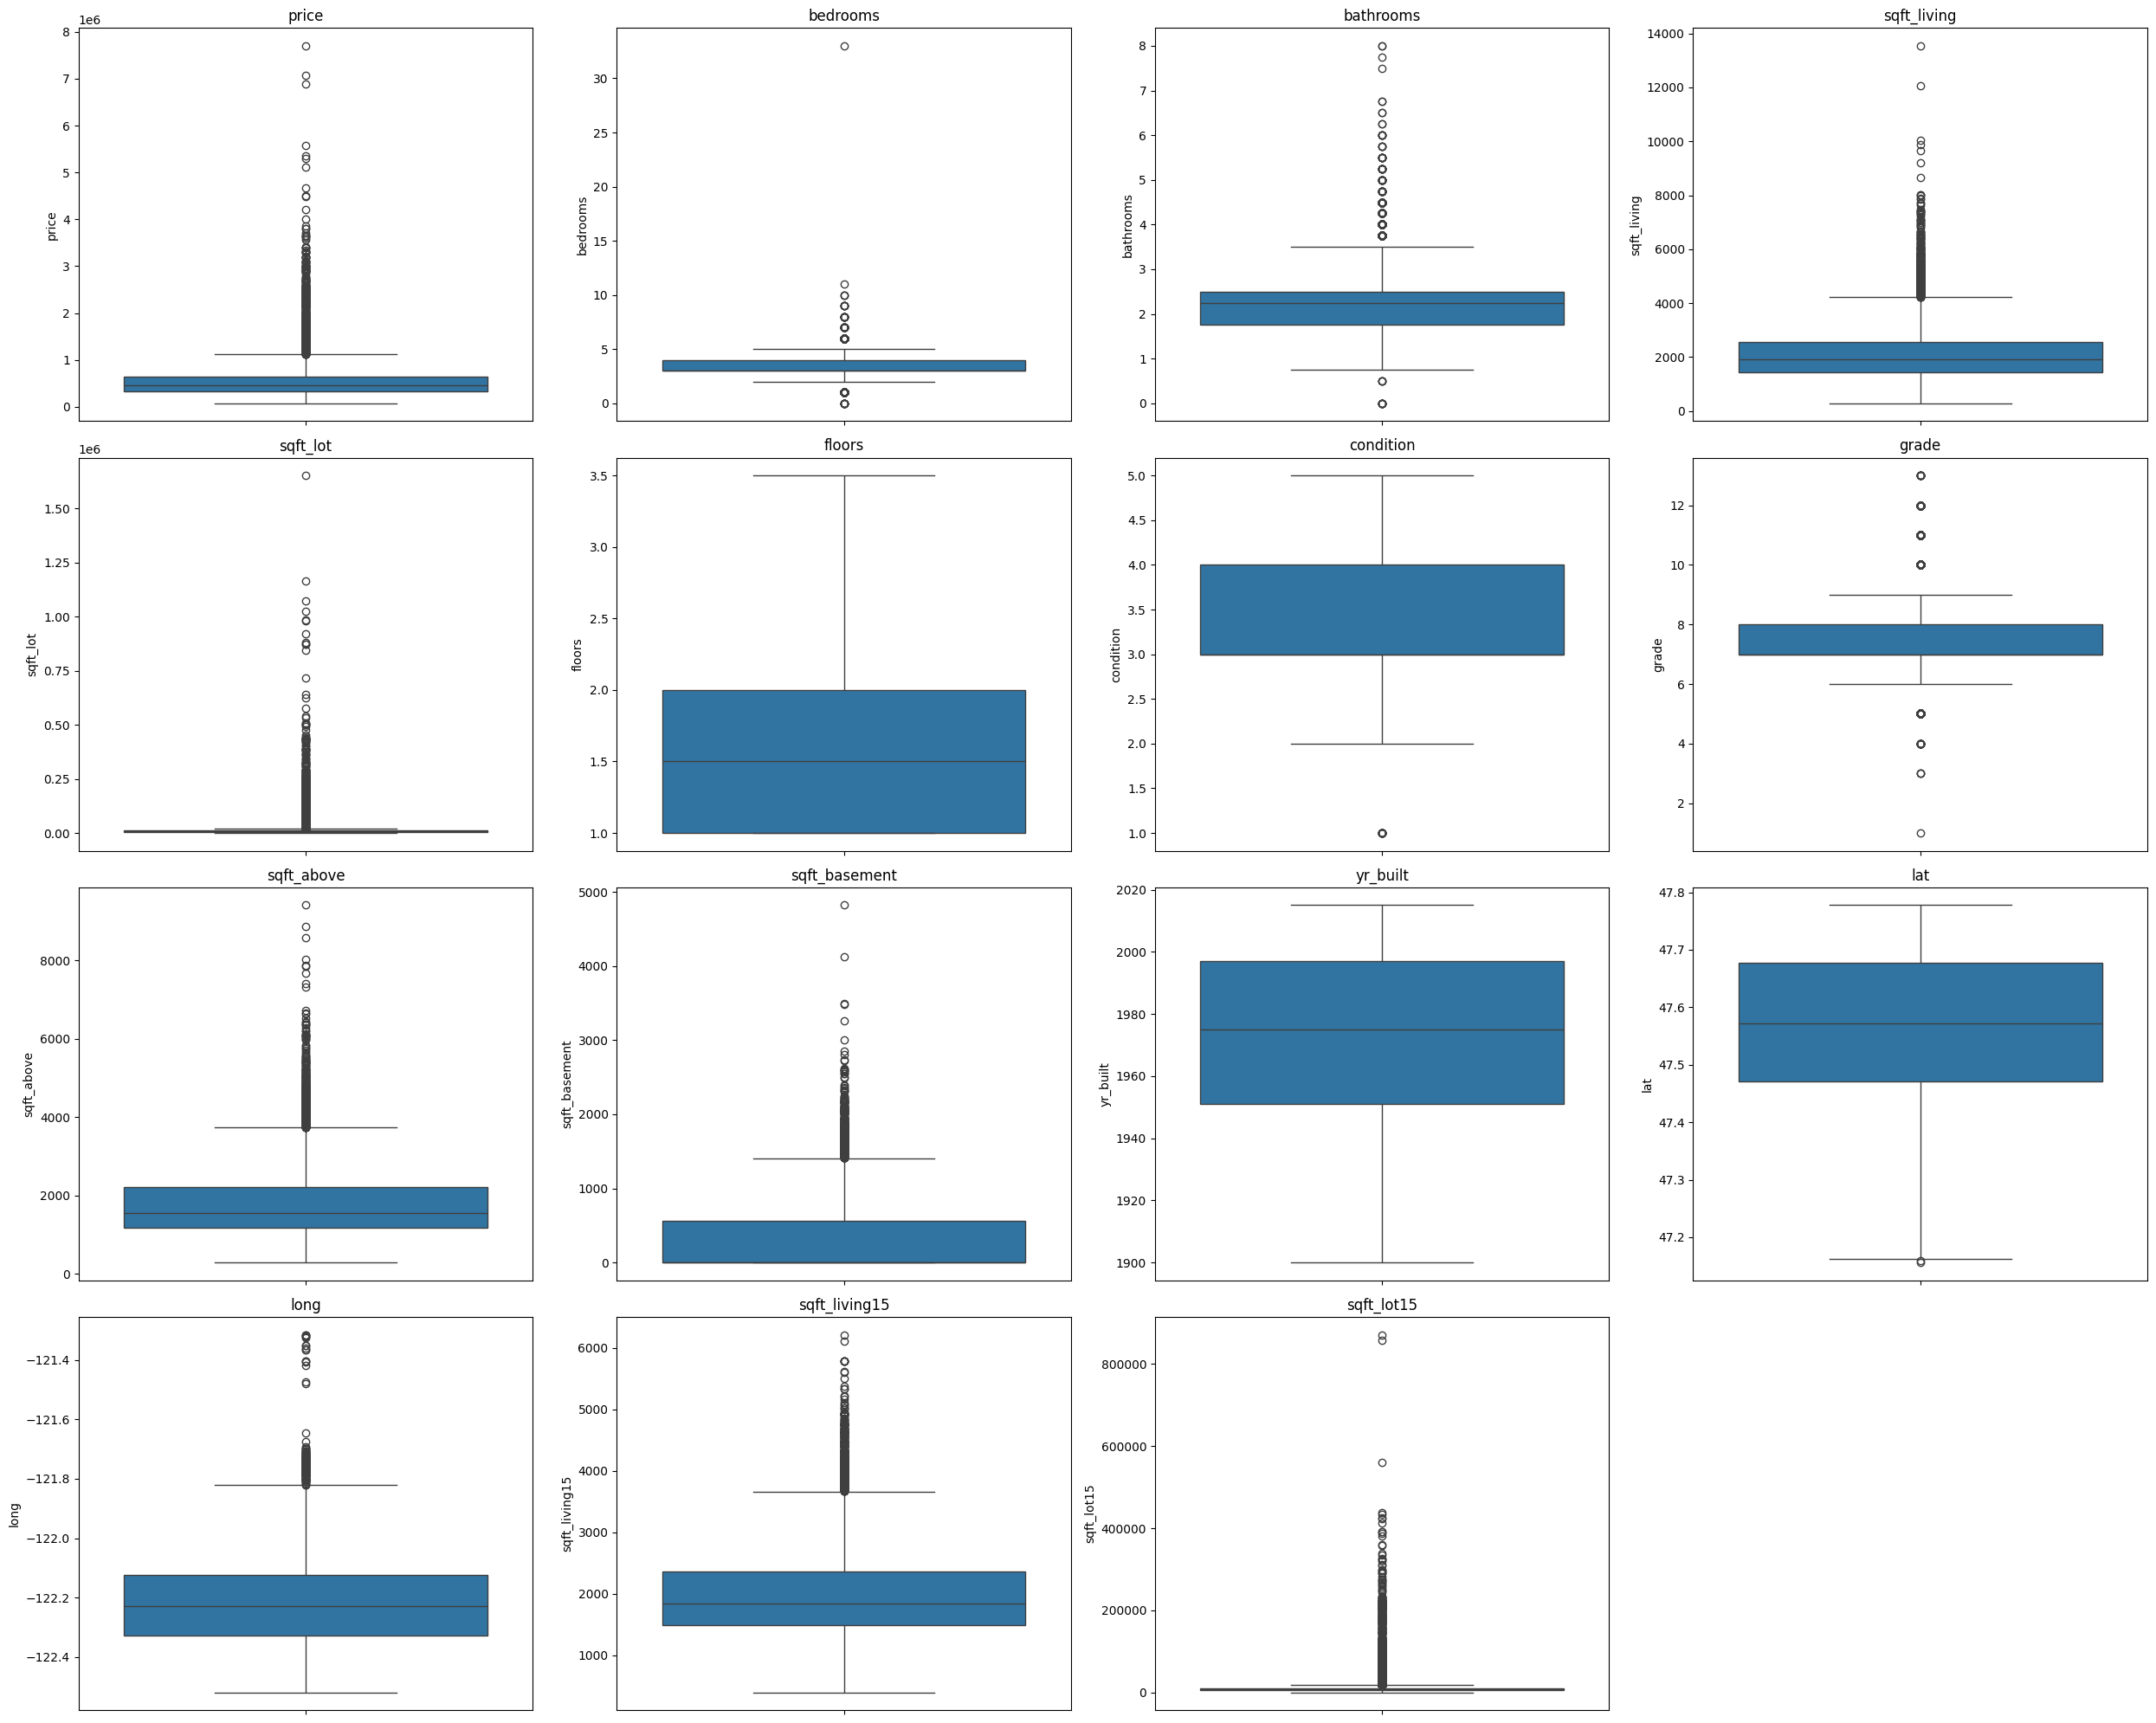

In [14]:
plt.figure(figsize=(25, 20))
for feature in df.drop('date',axis=1).columns.to_list():
    plt.subplot(4, 4, df.columns.to_list().index(feature))
    sns.boxplot(data=df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [15]:
df = df.drop('date',axis=1)

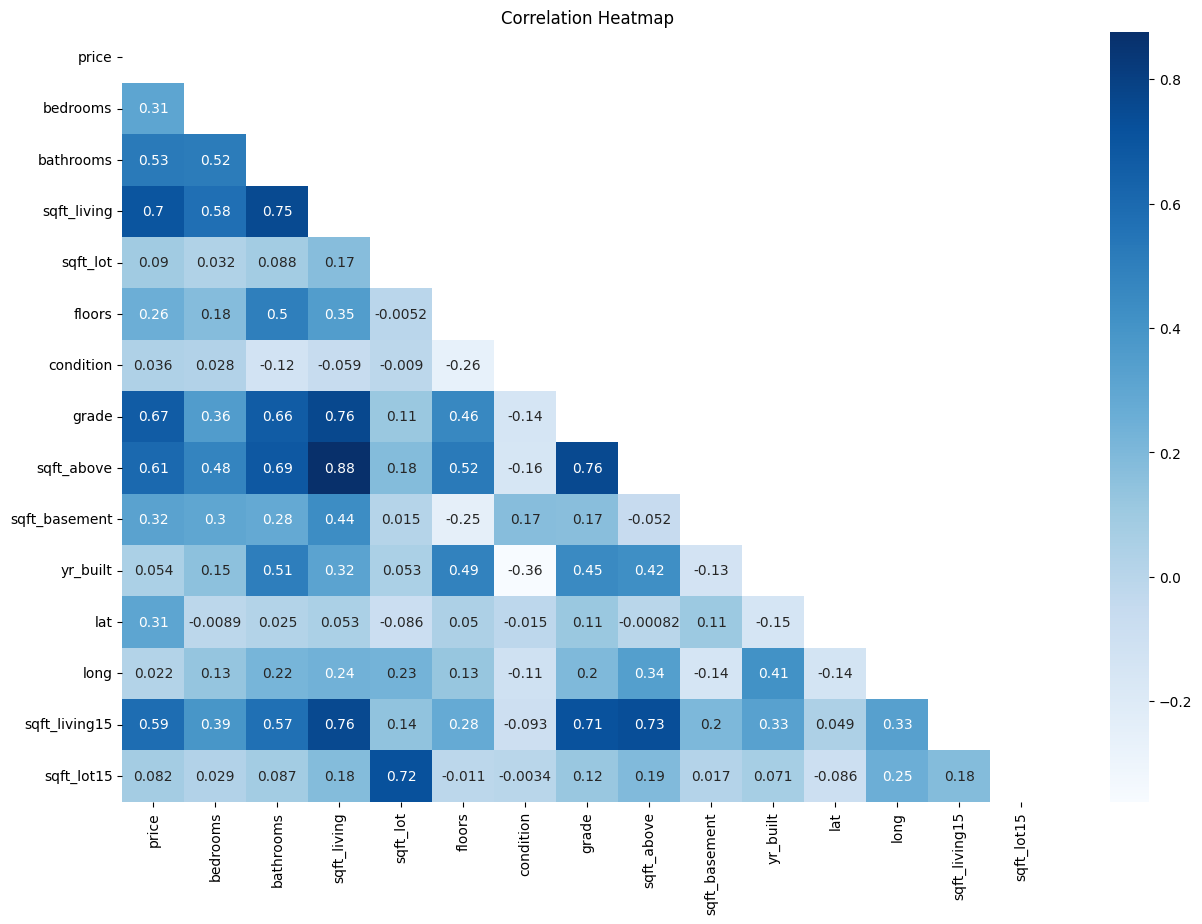

In [16]:
correlation_matrix =df.corr()
mask=np.triu(np.ones_like(correlation_matrix,dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True,mask=mask, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

Splitting the data into features and Targets

In [17]:
target = 'price'
X =df.drop(columns=[target])
y =df[target]

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size=0.25 , random_state=42 )
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16209, 14)
y_train shape: (16209,)
X_test shape: (5404, 14)
y_test shape: (5404,)


Model training

In [19]:
xgb = XGBRegressor(n_estimators= 2000 , max_depth= 7 , learning_rate = 0.01)

In [20]:
xgb.fit(X_train , y_train);

Model Evaluation 

Accuracy Score

In [21]:
y_xgb_pred=xgb.predict(X_test)

In [22]:
print ("train accuracy",xgb.score(X_train , y_train))
print ("test accuracy",xgb.score(X_test , y_test))

train accuracy 0.9746107823360215
test accuracy 0.836217267542952


In [23]:
# r2_score
r2=r2_score(y_test , y_xgb_pred)
print("Test Accuracy:", round(r2, 4))

Test Accuracy: 0.8362


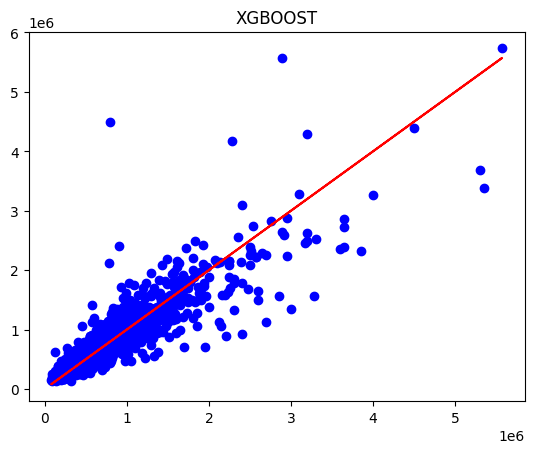

In [24]:
# XGB graph 
plt.scatter(y_test,y_xgb_pred, color="b")
plt.plot(y_test,y_test, color="r")
plt.title("XGBOOST");